---



---

# **Trabalho II** - Atividade Prática

---



---

# **Tópico I:** CNN

Observe o código abaixo da arquitetura SVM, este código executa a classificação da base de dados MNIST. Note que, ao empregar um pré-processamento dos dados, necessitamos de apenas 25 componentes principais para obter uma acurácia de 98,33%.

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.layers import MaxPooling2D
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow import keras

# Carregando o conjunto de dados MNIST manualmente
from tensorflow.keras.datasets import mnist

In [2]:
(X, y), (_, _) = mnist.load_data()

# Redimensionando e normalizando os dados
X = X.reshape(-1, 784) / 255.0

# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando PCA para redução de dimensionalidade
n_components = 25  # Número de componentes principais
pca = PCA(n_components=n_components, random_state=42)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Treinando um classificador SVM
svm = SVC(kernel='rbf', C=10)

st = time.time()
svm.fit(x_train_pca, y_train)
et = time.time()
tempo_decorrido = et - st


# Fazendo previsões no conjunto de teste
y_pred = svm.predict(x_test_pca)

# Calculando a acurácia do classificador
accuracy = accuracy_score(y_test, y_pred)
print(' ')

print(f'Acurácia do SVM junto aos dados de teste: {accuracy:.4f}')

11490434/11490434 [==============================] - 0s 0us/step
 
Acurácia do SVM junto aos dados de teste: 0.9833




---


## **Agora é sua vez:**

1. Proponha uma estrutura de CNN capaz de superar a acurácia obtida via SVM, junto aos dados de teste;
2. Salve, no diretório, seu modelo proposto.

---

In [3]:
# Complete com seu código
(X, y), (_, _) = mnist.load_data()
X = X.reshape(-1, 28, 28, 1) / 255.0

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Treinando um classificador SVM
model = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu',
                                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu',
                                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
st = time.time()
model.fit(x_train, y_train, epochs=5, validation_split=0.2)
et = time.time()
tempo_decorrido = et - st

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(' ')
print(f'Acurácia do CNN junto aos dados de teste: {test_accuracy:.4f}')

Epoch 1/5
1200/1200 [==============================] - 15s 4ms/step - loss: 0.1992 - accuracy: 0.9382 - val_loss: 0.0680 - val_accuracy: 0.9791
Epoch 2/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0550 - val_accuracy: 0.9824
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.0462 - val_accuracy: 0.9848
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0494 - val_accuracy: 0.9846
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0416 - accuracy: 0.9884
 
Acurácia do CNN junto aos dados de teste: 0.9884


In [4]:
# Salvar modelo
model.save("model_A.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---



---


# **Tópico II - Transfer Learning:**

Transfer Learning (TL) é uma técnica de aprendizado de máquina onde um modelo pré-treinado em um conjunto de dados é usado como ponto de partida para resolver outra tarefa relacionada. Em vez de treinar um modelo do zero, transferimos o conhecimento adquirido pelo modelo pré-treinado para melhorar o desempenho em uma tarefa específica. Isso economiza tempo e recursos de treinamento, pois o modelo já aprendeu características gerais úteis em sua tarefa anterior e pode adaptá-las para a nova tarefa, tornando-a mais eficiente e eficaz.

---

## **Agora é sua vez:**

Aplique a técnica Transfer Learning (TL) para a versão binária do problema de classificação MNIST. Note que, o problema do tópico I possuía 10 classes. No entanto, para o tópico II, você terá que converter o problema do tópico I para um problema binário e resolver esse problema binário via TL.

1. Carregue seu modelo (salvo no tópico I) capaz de executar a classificação multiclasse para a base de dados MNIST;

2. Faça alterações necessárias de forma que seja possível resolver a versão binária de classificação para a base de dados MNIST (classe 0 para digitos de 0 a 4, classe 1 para digitos de 5 a 9) **via TL**;

3. Obtenha a acurácia do modelo final junto aos dados de teste (neste problema binário).

**Dica:** é possível obter resultados interessantes usando a softMax na versão final do modelo.

---

In [59]:
x_train.shape

(48000, 28, 28, 1)

In [60]:
y_train.shape

(48000,)

In [27]:
y_test_binary

array([1, 0, 0, ..., 0, 1, 1])

In [34]:
# Complete com seu código

model_A = keras.models.load_model("model_A.h5")

model_B_on_A = keras.models.Sequential(model_A.layers[:-1])

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
#model_B_on_A.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
#model_B_on_A.add(MaxPooling2D((2, 2)))
model_B_on_A.add(tf.keras.layers.Dropout(0.25))
model_B_on_A.add(tf.keras.layers.Flatten())
model_B_on_A.add(tf.keras.layers.Dense(128, activation='relu'))
model_B_on_A.add(tf.keras.layers.Dropout(0.5))
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_B_on_A.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convertendo o problema em uma classificação binária
y_train_binary = (y_train >= 5).astype('int')  # Classes 0 para digitos de 0 a 4, Classes 1 para digitos de 5 a 9
y_test_binary = (y_test >= 5).astype('int')

In [ ]:
model_A.summary()
model_B_on_A.summary()

In [ ]:
history = model_B_on_A.fit(x_train, y_train_binary, epochs=3, validation_data=(x_test, y_test_binary))

Epoch 1/3
 311/1875 [===>..........................] - ETA: 4s - loss: nan - accuracy: 0.5192

In [32]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
historico = model_B_on_A.fit(x_train, y_train_binary, epochs=10, validation_data=(x_test, y_test_binary))
historico.history.keys()

import matplotlib.pyplot as plt
plt.plot(historico.history['accuracy']);

plt.xlabel("Número de Épocas")
plt.ylabel("Acurácia")

plt.show()

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: nan - accuracy: 0.5099 - val_loss: nan - val_accuracy: 0.5139
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.5099 - val_loss: nan - val_accuracy: 0.5139
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.5099 - val_loss: nan - val_accuracy: 0.5139
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.5099 - val_loss: nan - val_accuracy: 0.5139
Epoch 5/10
 835/1875 [============>.................] - ETA: 3s - loss: nan - accuracy: 0.5115

KeyboardInterrupt: ignored

In [20]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model_B_on_A.evaluate(x_test, y_test)
print(f"Acurácia do modelo no conjunto de teste: {test_accuracy:.4f}")

375/375 [==============================] - 3s 6ms/step - loss: 0.2100 - accuracy: 0.1102
Acurácia do modelo no conjunto de teste: 0.1102


In [8]:
pred = model_B_on_A.predict(x_test)
pred = (pred > 0.5)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_binary, pred)

print('Acurácia Obtida: ',acc*100)

375/375 [==============================] - 1s 2ms/step
Acurácia Obtida:  49.45




---



---


# **Tópico III:** Autoencoder

Abaixo, dois gráficos representam duas situações: I) Pouca Separabilidade e II) Separabilidade Maximizada entre as classes.

#### I) Pouca Separabilidade Entre as Classes:

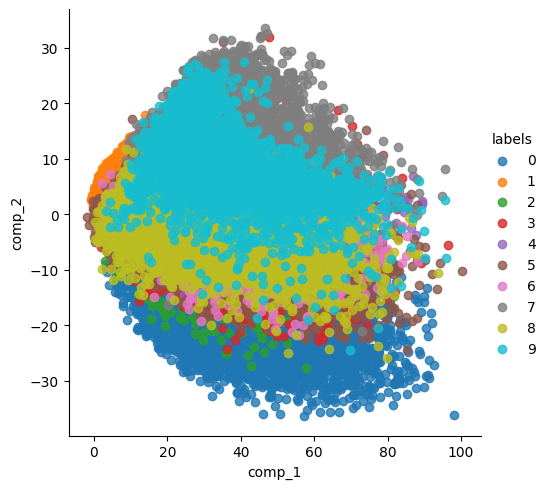


#### II) Separabilidade Maximizada Entre as Classes:

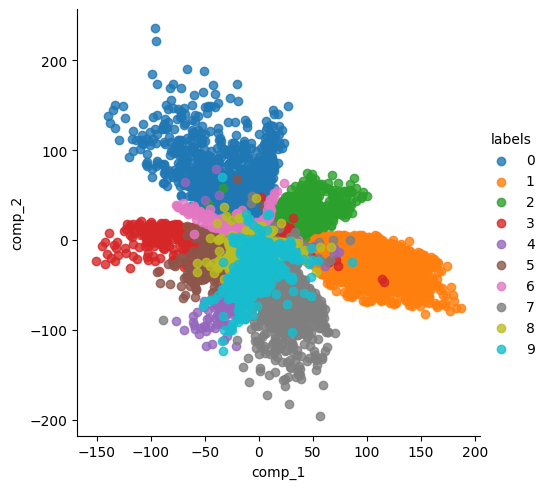

#### O código abaixo apresenta uma estrutura do tipo autoencoder com **pouca separabilidade** entre as classes:

In [11]:
# Suprime avisos para manter a saída mais limpa.
import warnings
warnings.filterwarnings('ignore')

# Importa as bibliotecas TensorFlow e Keras.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten

# Carrega o conjunto de dados MNIST.
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normaliza os valores dos pixels para o intervalo [0, 1].
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redimensiona as imagens de treinamento para terem a forma original (28x28).
x_images = x_train.reshape(x_train.shape[0], 28, 28)

In [16]:
# Define uma camada de entrada para a rede neural autoencoder com forma (28, 28, 1).
input_img = Input(shape=(28, 28, 1))

# Camadas de codificação (encoder):
# - A primeira camada densa com 512 unidades e ativação 'tanh'.
encoded = Dense(512, activation='tanh')(input_img)
# - A segunda camada densa com 128 unidades e ativação 'tanh'.
encoded = Dense(128, activation='tanh')(encoded)
# - A terceira camada densa com 32 unidades e ativação 'tanh'.
encoded = Dense(32, activation='tanh')(encoded)

# A camada Flatten 'aplanou' a saída do encoder para uma única dimensão.
encoded = Flatten()(encoded)

# Camadas de decodificação (decoder):
# - A primeira camada densa com 2 unidades (usado para redução de dimensionalidade).
encoded = Dense(2)(encoded)
# - A primeira camada densa com 32 unidades e ativação 'tanh'.
decoded = Dense(32, activation='tanh')(encoded)
# - A segunda camada densa com 128 unidades e ativação 'tanh'.
decoded = Dense(128, activation='tanh')(decoded)
# - A terceira camada densa com 512 unidades e ativação 'tanh'.
decoded = Dense(512, activation='tanh')(decoded)

# A camada de saída com 784 unidades e ativação 'sigmoid' para reconstruir a imagem.
decoded = Dense(784, activation='sigmoid')(decoded)

# Cria o modelo autoencoder que mapeia da entrada para a saída.
autoencoder = Model(inputs=input_img, outputs=decoded)

In [18]:
autoencoder.compile(optimizer="adam", loss="mse")

# Redimensiona os dados de treinamento para as formas necessárias.
# - X_train_1 é uma cópia dos dados de treinamento com a forma (amostras, 28, 28, 1).
x_train_1 = x_train.reshape(x_train.shape[0], 28, 28, 1)
# - X_train_2 é uma cópia dos dados de treinamento com a forma (amostras, 784).
x_train_2 = x_train.reshape(x_train.shape[0], 784)

# Treina o modelo autoencoder usando os dados de entrada X_train_1 e as metas X_train_2.
# - 'epochs' define o número de épocas de treinamento.
# - 'verbose' controla a quantidade de informações exibidas durante o treinamento (1 para detalhes, 0 para silencioso).
history = autoencoder.fit(x_train_1, x_train_2, epochs=2, verbose=1)

Epoch 1/2
1875/1875 [==============================] - 22s 10ms/step - loss: 0.0557
Epoch 2/2
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0501


In [19]:
# Cria um modelo separado para o encoder, usando a camada de entrada 'input_img' e a saída 'encoded'.
encoder = Model(inputs=input_img, outputs=encoded)

1875/1875 [==============================] - 7s 4ms/step


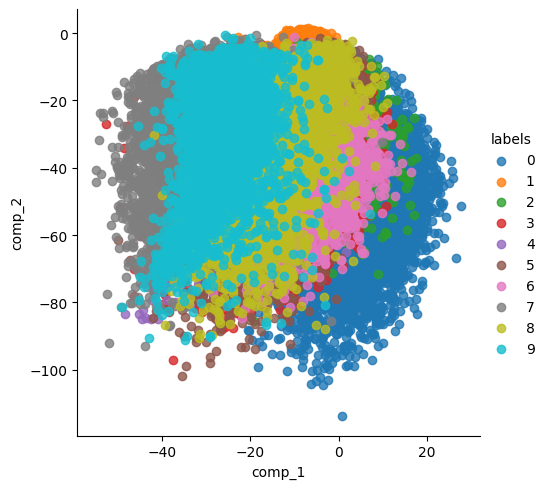

In [20]:
# Importa as bibliotecas seaborn (para visualização estatística) e pandas (para manipulação de dados).
import seaborn as sns
import pandas as pd

# Usa o encoder para projetar os dados de treinamento X_train_1 nos componentes latentes.
x_proj = encoder.predict(x_train_1[:60000])

# Exibe a forma do conjunto de dados projetado.
x_proj.shape

# Cria um DataFrame pandas chamado 'proj' para armazenar os componentes latentes.
proj = pd.DataFrame(x_proj)

# Nomeia as colunas do DataFrame como "comp_1" e "comp_2" para representar os componentes latentes.
proj.columns = ["comp_1", "comp_2"]

# Adiciona uma coluna chamada "labels" ao DataFrame para armazenar as etiquetas (rótulos) dos dados.
proj["labels"] = y_train[:60000]

# Cria um gráfico de dispersão (scatter plot) usando seaborn para visualizar os componentes latentes.
sns.lmplot(x="comp_1", y="comp_2", hue="labels", data=proj, fit_reg=False)



---

## **Agora é sua vez:**

- Faça alterações na estrutura fornecida (ou proponha uma estrutura autoencoder) de forma que a separabilidade entre as classes, na base de dados MNIST, seja maximizada;

- Plote seu resultado mostrando a separabilidade entre as classes.

---


In [ ]:
# Complete com seu código

#### Plot bidimensional com a separabilidade entre as classes:

In [ ]:
# Complete com seu código